<a href="https://colab.research.google.com/github/priyanshu3042/customer-segmentation-kmeans/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Shape: (7043, 21)

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Accuracy: 0.7910278250993753

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.66      0.47      0.55       479

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761


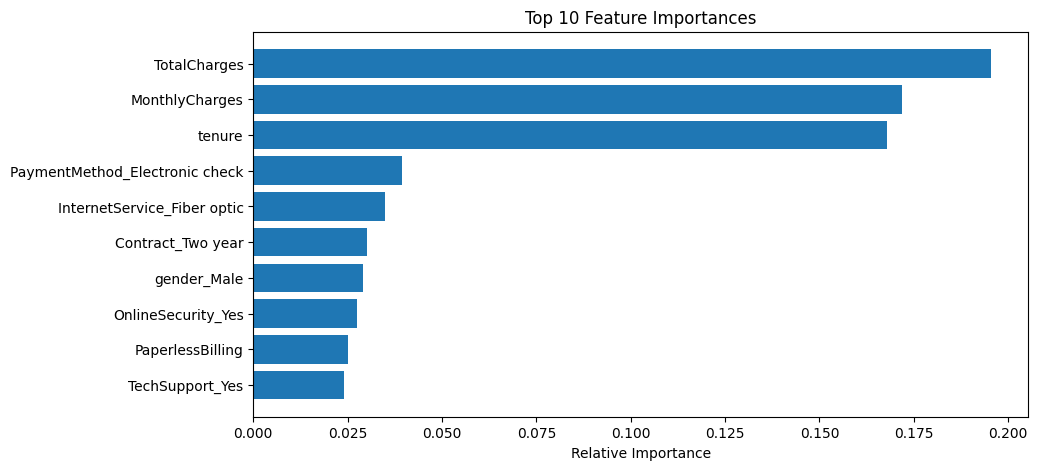

In [1]:
# STEP 1: Install & Import Libraries
!pip install -q pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# STEP 2: Load Dataset (Upload manually in Colab or use local path if in Jupyter)
from google.colab import files
uploaded = files.upload()

# After uploading, use the filename (e.g., 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# STEP 3: Basic EDA
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nChurn distribution:\n", df['Churn'].value_counts())

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


# Encode categorical variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# One-hot encode the rest
df = pd.get_dummies(df, drop_first=True)

# STEP 4: Feature Scaling & Splitting
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# STEP 5: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Evaluate Model
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 7: Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
